<a href="https://colab.research.google.com/github/joaquimcamara/dashlab/blob/main/Padr%C3%B5es_de_dados_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTANDO E AVALIANDO** </br>
Primeira avaliação.

In [ ]:
import pandas as pd

df = pd.read_csv('CC GENERAL.csv')

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#**ORGANIZANDO OS DADOS**

In [ ]:
df.drop(columns=['CUST_ID','TENURE'], inplace = True) #inplace nos permite modificar esse dataframe, sem criar outro

In [ ]:
#Procurando os nulos
missing = df.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [ ]:
#Fazendo a mediana dos valores presentes para substituir os faltantes
df.fillna(df.median(), inplace = True)
missing = df.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

**NORMALIZANDO OS DADOS**

In [ ]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(df.values)
colunas = df.columns
df1 = pd.DataFrame(values, columns=colunas)
df1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,0.039356,0.000787,0.091796,0.000000,0.091796,0.000000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962221,0.194178,0.134239,0.000000
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376517,0.098404,0.000020
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934207,0.077485,0.078135,0.000000
3,0.208887,0.000080,0.187872,0.187872,0.000000,0.025792,0.000010,0.000010,0.000000,0.000010,0.000125,0.000125,0.939988,0.000000,0.039147,0.000000
4,0.504298,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740060,0.418340,0.150967,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.025197,0.000884,0.257441,0.000000,0.257441,0.000000,0.000884,0.000000,0.000737,0.000000,0.000000,0.005306,0.884314,0.287928,0.043231,0.000442
8946,0.016485,0.000859,0.257811,0.000000,0.257811,0.000000,0.000859,0.000000,0.000716,0.000000,0.000000,0.005156,0.859370,0.237067,0.268419,0.000000
8947,0.022773,0.000811,0.140541,0.000000,0.140541,0.000000,0.000811,0.000000,0.000649,0.000000,0.000000,0.004866,0.973274,0.079099,0.080216,0.000243
8948,0.026526,0.001643,0.000000,0.000000,0.000000,0.072060,0.000000,0.000000,0.000000,0.000329,0.003942,0.000000,0.985535,0.103580,0.109898,0.000493


#**INICIANDO A CLUSTERIZAÇÃO COM O KMEANS**

Métricas de validação:
*  Externas e Internas
    *  Externas precisam de Labels e as Internas não precisam, são independentes de labels.
*  Compactação: Quão próximos estão um ponto dentro do mesmo cluster.
*  Separação: Quão bem separados estão os pontos em clusters diferentes.
*  Coeficiente de Silhouette:
                          S = (b-a)/max(a,b)
                          a = distância média entre o ponto e todos os outros do cluster (Compactação)
                          b = distância média entre o ponto e todos os outros pontos do cluster mais próximo
*  Se Positivo, então tem um valor válido (no geral)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [ ]:
from sklearn import metrics

In [ ]:
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')

In [ ]:
silhouette

0.3644845919974304

**Indíce de Davies-Bouldin**

In [ ]:
dbs = metrics.davies_bouldin_score(values, labels)
dbs #O mais próximo de zero possível

1.0757138590613295

**Índice Calinsk-Harabasz**

In [ ]:
ch = metrics.calinski_harabasz_score(values, labels)
ch #O mais alto possível

3431.79374284143

#**Validando os clusters**

**Validação Relativa**

In [ ]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, labels, metric='euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  ch = metrics.calinski_harabasz_score(dataset, labels)
  return s, dbs, ch

In [ ]:
s1, dbs1, ch1 = clustering_algorithm(3, values)
s1, dbs1, ch1

(0.32724464582661594, 1.3093507662143309, 3526.466834451541)

In [ ]:
s2, dbs2, ch2 = clustering_algorithm(5, values)
s2, dbs2, ch2

(0.36459833631826266, 1.0754516255078055, 3431.789575435624)

In [ ]:
s3, dbs3, ch3 = clustering_algorithm(10, values)
s3, dbs3, ch3

(0.30685157228211374, 1.1445159400075267, 3018.101268802906)

In [ ]:
i = 2
while i < 10:
  sw, dbsw, chw = clustering_algorithm(i, values)
  print('para i = ', i, sw, dbsw, chw)
  i+=1

para i =  2 0.29913992027435277 1.5180867343147846 3321.84635812273
para i =  3 0.3271751306897884 1.3102638818385068 3526.456164575466
para i =  4 0.3482575953242431 1.2212366810998647 3528.6954358649723
para i =  5 0.36462155982900213 1.0752866066041349 3431.7836691936104
para i =  6 0.36490241386590305 1.0452590368145118 3523.514161194325
para i =  7 0.3277820965463256 1.150783539809126 3398.3950272683933
para i =  8 0.30884184037734175 1.1747254271472631 3239.105051770773
para i =  9 0.3063274575700443 1.2048221535976458 3106.5531908254557


**Estrutra dos clusters** </br>
Validando se nossos dados podem ser clusterizados

In [ ]:
#Gerando um conjunto aleatório de dados
import numpy as np
random_data = np.random.rand(8950, 16) #o método random já gera número aleatório entre 0 e 1
s, dbs, ch = clustering_algorithm(5, random_data)
s, dbs, ch

(0.039155875288267826, 3.5486816022530085, 302.65325626384396)

**Validando a estabilidade do cluster**

In [ ]:
#dividindo a base de dados em três partes para validar a estabilidade
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, ch1 = clustering_algorithm(5, set1)
s2, dbs2, ch2 = clustering_algorithm(5, set2)
s3, dbs3, ch3 = clustering_algorithm(5, set3)
print(s1, dbs1, ch1)
print(s2, dbs2, ch2)
print(s3, dbs3, ch3)#quanto mais similares os valores, melhor

0.3688486109603572 1.0588202114905991 1204.064049138465
0.35406999696241026 1.1389554530299946 1194.945411949724
0.3669405020596727 1.0989564562726915 1167.510700870205


#**Visualizando os clusters**

**Gerando Gráficos**

<Figure size 3600x3600 with 0 Axes>

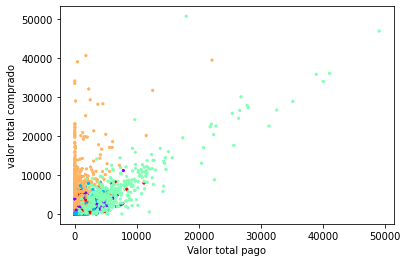

<Figure size 3600x3600 with 0 Axes>

In [ ]:
#Gerando gráficos para Purchase e Payments
import matplotlib.pyplot as plt
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c = labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('valor total comprado')
plt.figure(figsize=(50,50))

In [ ]:
#import seaborn as sns
#df['cluster'] = labels
#sns.pairplot(df[0:], hue="cluster")

#**Os valores dos atributos no cluster**

In [ ]:
df.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
1        3278.0   443.992358   846.597972   0.000000    23.315538   
2        1540.0  1142.222657  1664.035755   0.000000   211.566656   
3        1072.0  1794.024195  1982.950586   0.000000   506.925348   
4         411.0  1987.501586  1854.459156  70.794108  1018.958891   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
1          82.992153   411.193793   9630.367575            3278.0  0.774417   
2         554.332740  1370.859355  19043.138560            1540.0  0.928053   
3        1087.920500  2308.762488  14581.459140            1072.0  0.862131   
4        1337.287314  2138.678431  11670.179850             411.0  0.989486   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1330.593643   8345.641905           2649.0  0.001799   
1        ...       248.800040   4483.503862           3278.0  0.246549   
2        ...       524.184580  18621.013310           1540.0  0.278582   
3        ...       884.718306  21235.065300           1072.0  0.117384   
4        ...      7112.618584  76406.207520            411.0  0.019318   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.023260  0.0  0.0  0.000000  0.000000  0.6  
1        0.346601  0.0  0.0  0.000000  0.444444  1.0  
2        0.367203  0.0  0.0  0.083333  0.545455  1.0  
3        0.186853  0.0  0.0  0.083333  0.142857  1.0  
4        0.090901  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

**Analisando os valores**

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[5.04263792e-01, 2.72194282e-04, 6.17808431e-02, 3.62269020e-02,
        2.55756543e-02, 2.52903017e-01, 6.73170559e-05, 2.56975193e-05,
        4.50651626e-05, 5.74388410e-05, 1.15687334e-03, 1.33194105e-03,
        7.19174706e-01, 1.66205262e-01, 1.79245673e-01, 5.52303554e-07],
       [6.91386971e-02, 2.30552524e-04, 1.21267798e-01, 4.80255998e-02,
        7.33425496e-02, 2.43607736e-02, 1.72581896e-04, 3.37097813e-05,
        1.40021986e-04, 7.93309218e-06, 1.24113667e-04, 2.86037895e-03,
        9.43728649e-01, 1.53557708e-01, 5.68217245e-02, 7.57977264e-05],
       [1.59699490e-01, 2.45649360e-04, 4.38116859e-01, 2.56325660e-01,
        1.81962376e-01, 2.57889184e-02, 2.04826443e-04, 8.87914942e-05,
        1.51162866e-04, 9.36296056e-06, 1.69350945e-04, 6.17145756e-03,
        6.04336246e-01, 4.02584838e-01, 8.54128174e-02, 7.26645255e-05],
       [2.35141479e-01, 2.16555293e-04, 6.03857074e-02, 3.44170171e-02,
        2.59739049e-02, 4.00128071e-01, 5.26401668e-05, 2.048

In [ ]:
#analisando os atributos de acordo com a variância (queremos os que mais variam)
max = len(centroids[0])
for i in range(max):
  print(df.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


In [ ]:
#BALANCE, PURCHASES (compras), CASH_ADVANCE (saques), CREDIT_LIMIT (limite de crédito total), PAYMENTS(pagamentos)

In [ ]:
description = df.groupby('cluster')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
n_clients = description.size()
description = description.mean()
description['n_clientes'] = n_clients
description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clientes
cluster,,,,,,
0,3037.962543,385.248630,1636.917210,4495.771989,968.890376,2649
1,443.992358,629.345171,141.569301,5132.945933,814.477150,3278
2,1142.222657,3268.886929,183.019398,4097.701397,3037.241495,1540
3,1794.024195,475.494823,3270.246792,3976.372399,4709.556601,1072
4,1987.501586,854.865815,421.129352,2227.737226,1336.238911,411


#**Interpretando os clusters**

CLUSTER 0: Clientes que mais gastam. O foco deles é o saque. Péssimos pagadores. Segunda maior quantidade de clientes</br>
CLUSTER 1: Clientes que gastam pouco. E com o maior limite. Bons pagadores. Maior número de clientes </br>
CLUSTER 2: Clientes que gastam muito com compras, Melhores pagadores </br>
CLUSTER 3: Clientes que gastam mais com saques </br>
CLUSTER 4: Clientes com o menor limite de crédito. Menor quantidade de clientes</br>

In [ ]:
df.groupby('cluster')['PRC_FULL_PAYMENT'].describe() #Porcentagem média paga da fatura por cliente

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
1,3278.0,0.246549,0.346601,0.0,0.0,0.000000,0.444444,1.0
2,1540.0,0.278582,0.367203,0.0,0.0,0.083333,0.545455,1.0
3,1072.0,0.117384,0.186853,0.0,0.0,0.083333,0.142857,1.0
4,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0


In [ ]:
n_clientes_total = description['n_clientes'].sum()

In [ ]:
n_clientes_cluster0 = description['n_clientes'][0]
prc_clientes_cluster0 = (n_clientes_cluster0/n_clientes_total)*100
prc_clientes_cluster0

29.59776536312849

In [ ]:
n_clientes_cluster1 = description['n_clientes'][1]
prc_clientes_cluster1 = (n_clientes_cluster1/n_clientes_total)*100
prc_clientes_cluster1

36.62569832402235

In [ ]:
#Pode aplicar alguma estratégia de negócio em algum(ns) dos grupos
#Teste AB